In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('housing+data.csv')

In [3]:
data

,Id,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,1,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,2,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,3,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,4,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,5,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,1414,6,1999,953,SBrkr,1647,2,Attchd,2,460,NaN,NaN,175000
1414,1415,6,1978,1542,SBrkr,2073,2,Attchd,2,500,MnPrv,NaN,210000
1415,1416,7,1941,1152,SBrkr,2340,2,Attchd,1,252,GdPrv,Shed,266500
1416,1417,5,1950,1078,FuseA,1078,1,NaN,1,240,NaN,NaN,142125


In [4]:
# Remove any unnecessary column from the data
del data['Id']

In [5]:
data

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
0,7,2003,856,SBrkr,1710,2,Attchd,2,548,NaN,NaN,208500
1,6,1976,1262,SBrkr,1262,2,Attchd,2,460,NaN,NaN,181500
2,7,2001,920,SBrkr,1786,2,Attchd,2,608,NaN,NaN,223500
3,7,1915,756,SBrkr,1717,1,Detchd,3,642,NaN,NaN,140000
4,8,2000,1145,SBrkr,2198,2,Attchd,3,836,NaN,NaN,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1413,6,1999,953,SBrkr,1647,2,Attchd,2,460,NaN,NaN,175000
1414,6,1978,1542,SBrkr,2073,2,Attchd,2,500,MnPrv,NaN,210000
1415,7,1941,1152,SBrkr,2340,2,Attchd,1,252,GdPrv,Shed,266500
1416,5,1950,1078,FuseA,1078,1,NaN,1,240,NaN,NaN,142125


In [6]:
# How many rows and columns
print('Rows: ',data.shape[0])
print('Columns: ',data.shape[1])

Rows:  1418
Columns:  12


In [8]:
# Explain the five points summary of the data
data.describe().T   #T is used to transpose

,count,mean,std,min,25%,50%,75%,max
OverallQual,1418.0,6.114245,1.385858,1.0,5.00,6.0,7.0,10.0
YearBuilt,1418.0,1971.600846,30.064293,1872.0,1954.00,1973.0,2001.0,2010.0
TotalBsmtSF,1418.0,1061.712271,437.277589,0.0,796.50,994.0,1303.5,6110.0
GrLivArea,1418.0,1519.645275,527.412584,334.0,1132.50,1468.5,1786.0,5642.0
FullBath,1418.0,1.565585,0.551127,0.0,1.00,2.0,2.0,3.0
GarageCars,1418.0,1.763752,0.755995,0.0,1.00,2.0,2.0,4.0
GarageArea,1418.0,472.617772,216.068677,0.0,324.25,478.0,576.0,1418.0
SalePrice,1418.0,182089.485896,79970.934085,34900.0,130000.00,164800.0,215000.0,755000.0


In [10]:
data.describe(include='object').T

,count,unique,top,freq
Electrical,1417,5,SBrkr,1300
GarageType,1275,6,Attchd,800
Fence,270,4,MnPrv,148
MiscFeature,52,4,Shed,47


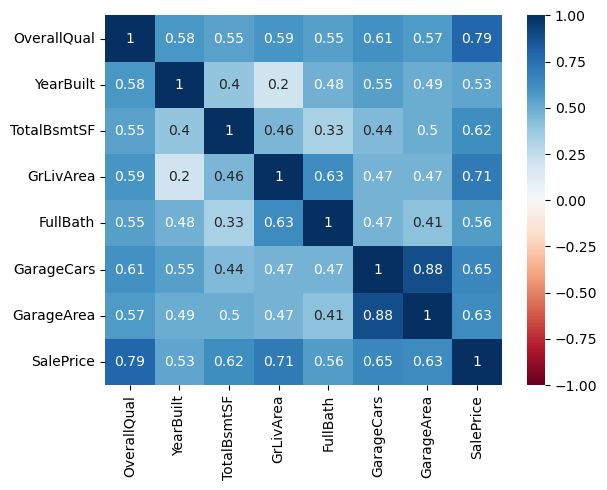

In [14]:
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,cmap='RdBu')
plt.show()

In [17]:
num_cols = data.select_dtypes(include=np.number).columns
cal_cols = data.select_dtypes(include=object).columns

In [18]:
num_cols

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

In [19]:
cal_cols

Index(['Electrical', 'GarageType', 'Fence', 'MiscFeature'], dtype='object')

In [68]:
num_cols = ['YearBuilt','TotalBsmtSF','GrLivArea','GarageArea','SalePrice']
cal_cols = ['OverallQual','Fence','MiscFeature','GarageType','Electrical','FullBath','GarageCars']

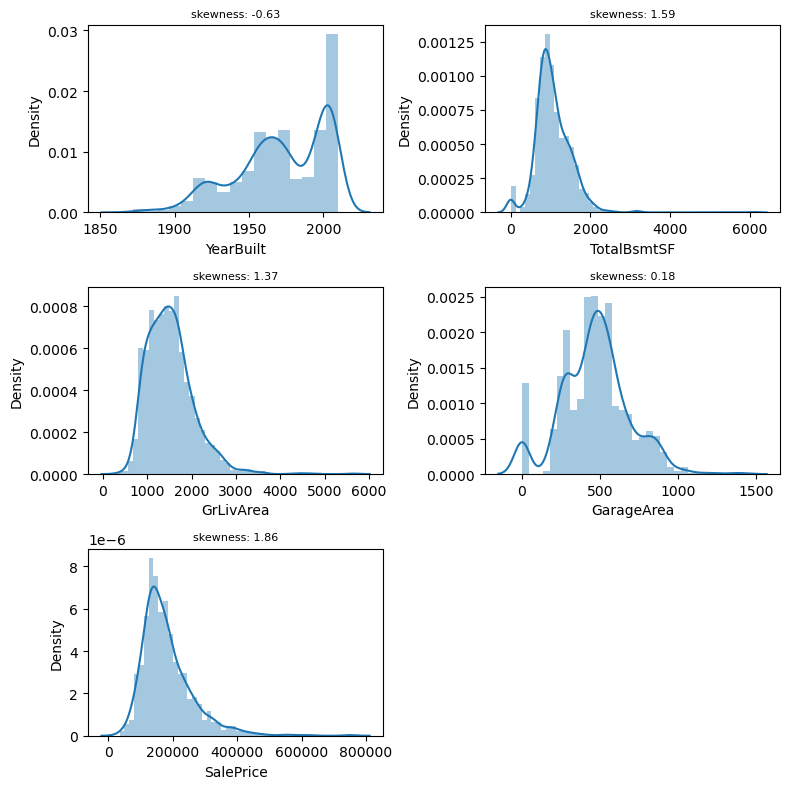

In [69]:
plt.rcParams['figure.figsize'] = 8,8
t = 1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.distplot(data[i])
    plt.title(f'skewness: {round(data[i].skew(),2)}',fontsize=8)
    t+=1
plt.tight_layout()
plt.show()

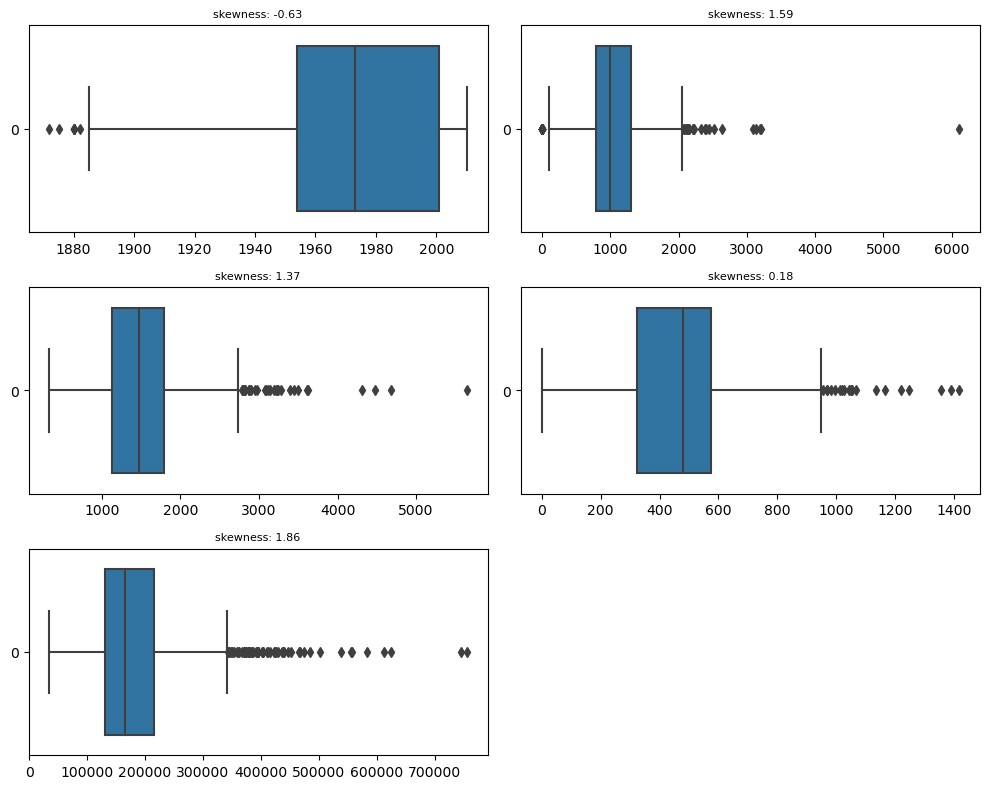

In [70]:
plt.rcParams['figure.figsize'] = 10,8
t = 1
for i in num_cols:
    plt.subplot(3,2,t)
    sns.boxplot(data[i],orient='h')
    plt.title(f'skewness: {round(data[i].skew(),2)}',fontsize=8)
    t+=1
plt.tight_layout()
plt.show()

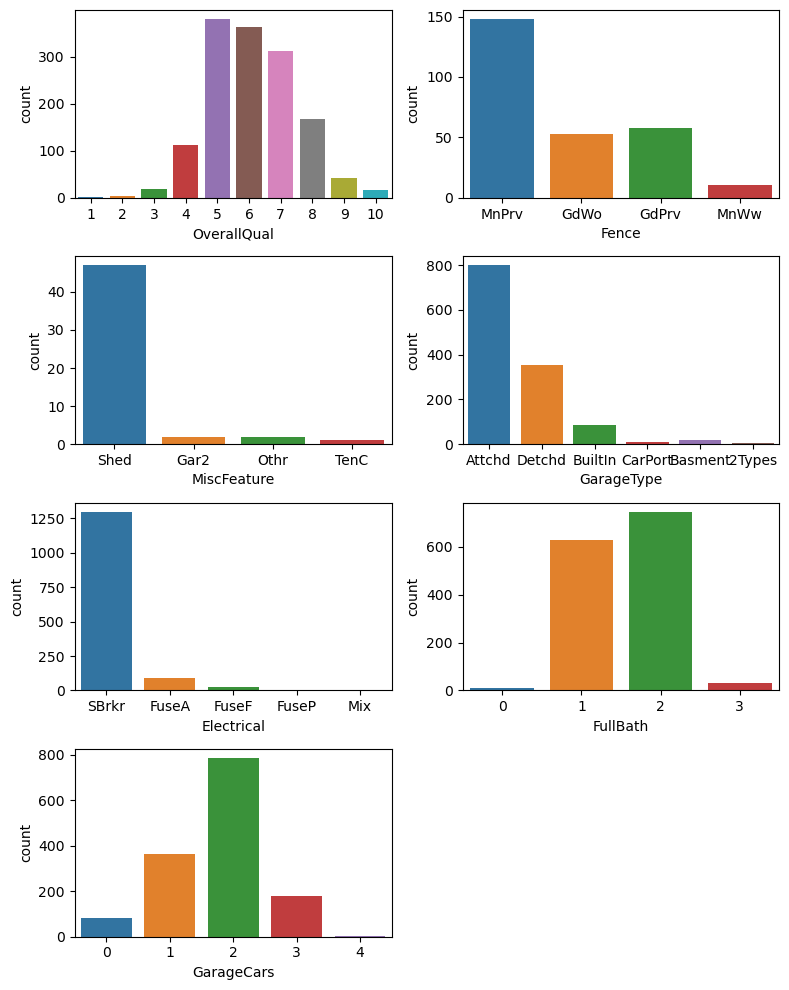

In [71]:
# show the distribution for categories columns
plt.rcParams['figure.figsize'] = 8,10
t=1
for i in cal_cols:
    plt.subplot(4,2,t)
    sns.countplot(x=data[i])
    t+=1
plt.tight_layout()
plt.show()

# Bivariate Analysis

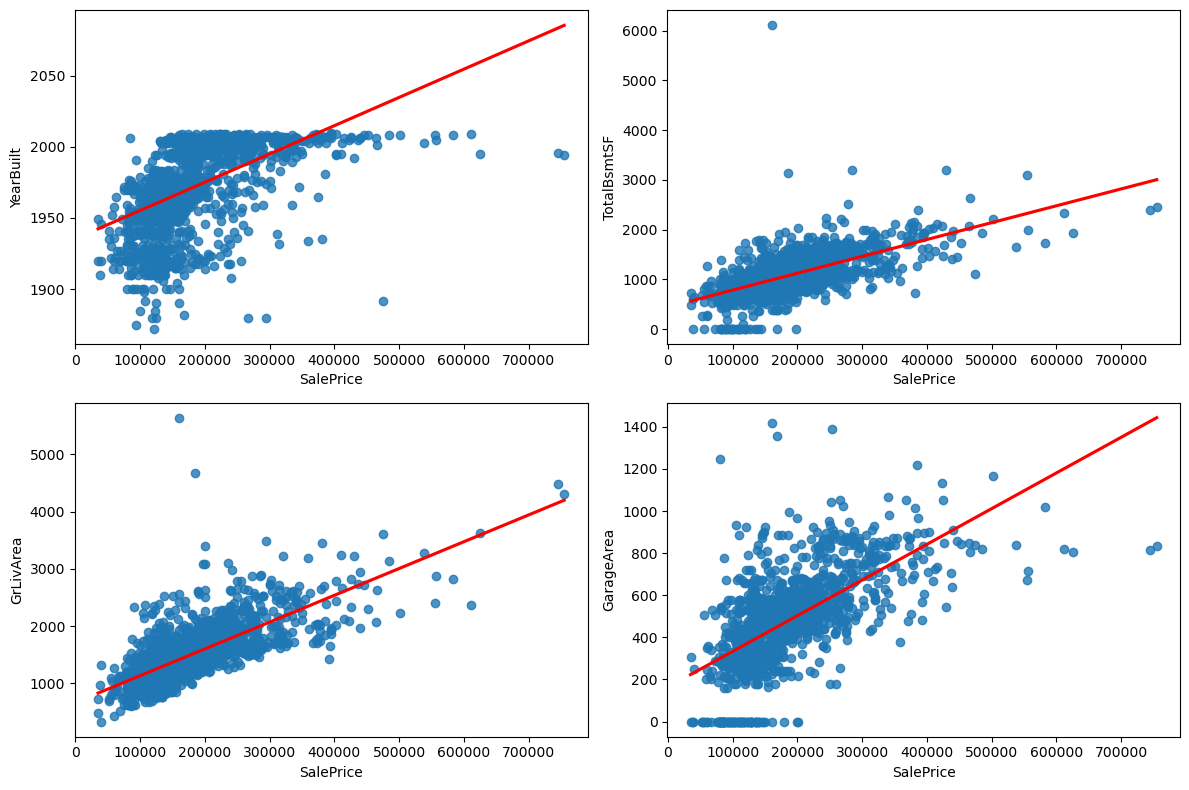

In [72]:
plt.rcParams['figure.figsize']=12,8
t = 1
for i in num_cols:
    if i != 'SalePrice':
        plt.subplot(2,2,t)
        sns.regplot(x=data['SalePrice'],y=data[i],ci=0,line_kws={'color':'red'})
        t+=1
plt.tight_layout()
plt.show()

In [55]:
# as the total basement area is increasing the sales price is also increasing
# 

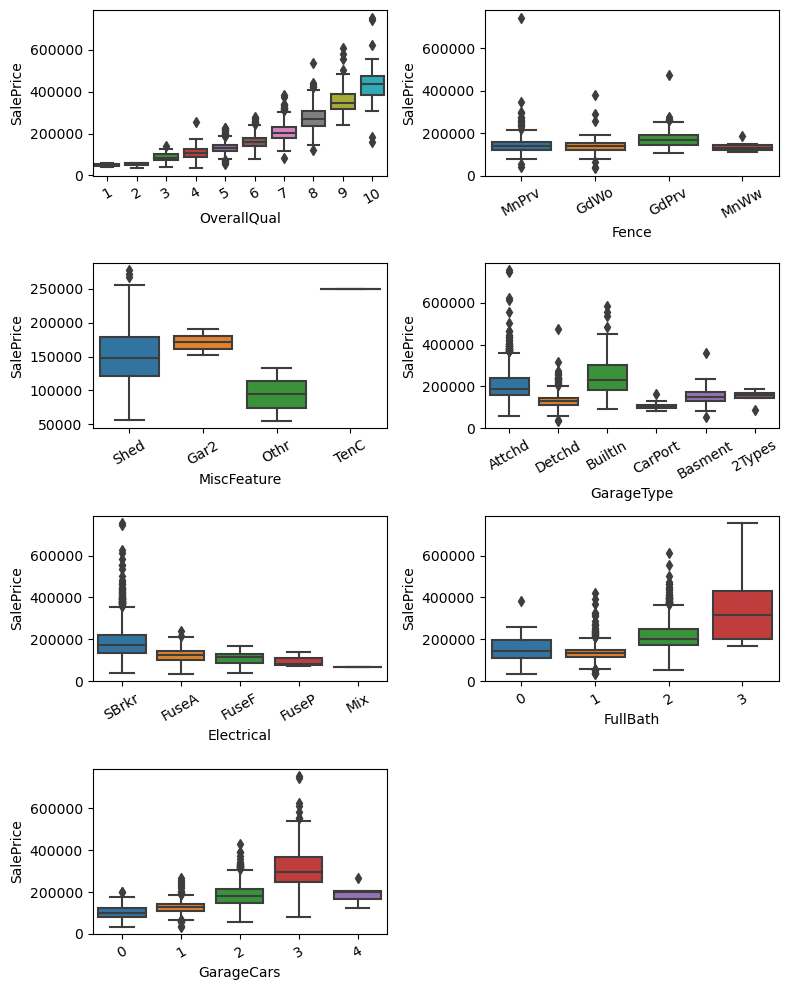

In [74]:
plt.rcParams['figure.figsize'] = 8,10
t=1
for i in cal_cols:
    plt.subplot(4,2,t)
    sns.boxplot(x=i,y='SalePrice',data=data)
    plt.xticks(rotation=30)
    t+=1
plt.tight_layout()
plt.show()

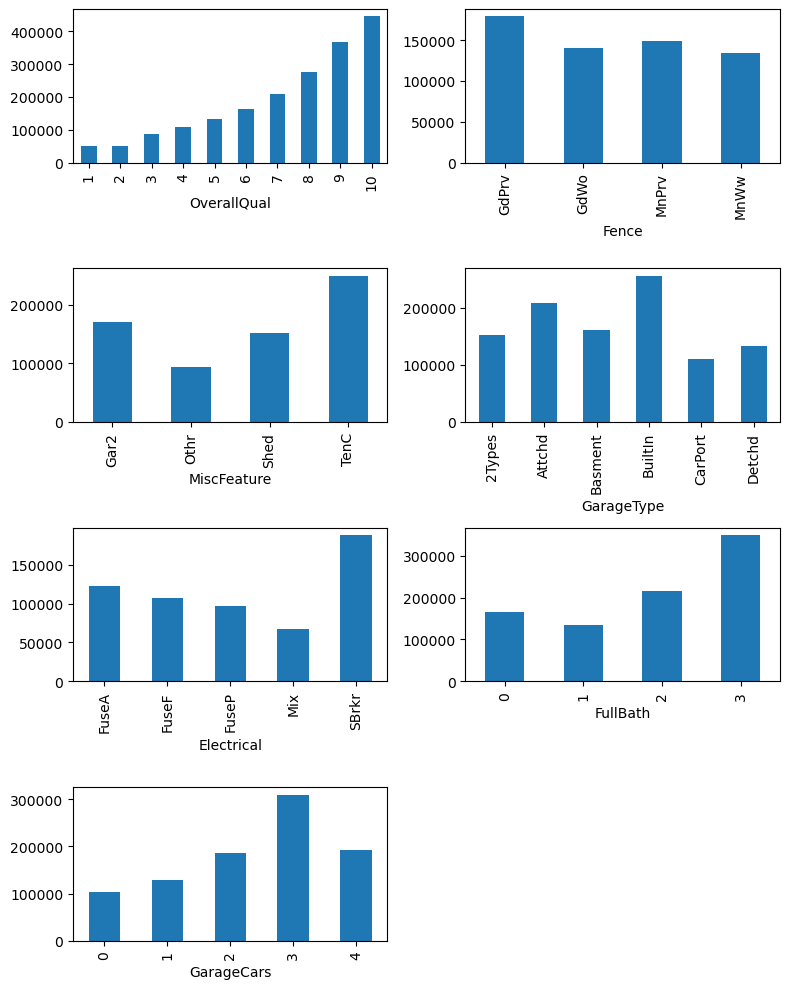

In [76]:
t=1
for i in cal_cols:
    plt.subplot(4,2,t)
    data.groupby(by=i)['SalePrice'].mean().plot(kind='bar')
    t+=1
plt.tight_layout()
plt.show()

In [79]:
data.isnull().sum()

OverallQual       0
YearBuilt         0
TotalBsmtSF       0
Electrical        1
GrLivArea         0
FullBath          0
GarageType      143
GarageCars        0
GarageArea        0
Fence          1148
MiscFeature    1366
SalePrice         0
dtype: int64

In [82]:
# or
((data.isnull().sum()/data.shape[0])*100).sort_values(ascending=False)

MiscFeature    96.332863
Fence          80.959097
GarageType     10.084626
Electrical      0.070522
OverallQual     0.000000
YearBuilt       0.000000
TotalBsmtSF     0.000000
GrLivArea       0.000000
FullBath        0.000000
GarageCars      0.000000
GarageArea      0.000000
SalePrice       0.000000
dtype: float64

In [84]:
data[data['GarageType'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
37,4,1955,0,FuseP,1152,2,NaN,0,0,NaN,NaN,82000
39,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
...,...,...,...,...,...,...,...,...,...,...,...,...
1387,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000
1407,5,1970,630,SBrkr,630,1,NaN,0,0,NaN,NaN,92000
1408,5,1974,896,SBrkr,1792,2,NaN,0,0,NaN,NaN,136000
1411,5,2006,1140,SBrkr,1140,1,NaN,0,0,NaN,NaN,84500


In [86]:
data['GarageType'] = np.where((data['GarageCars']==0)&(data['GarageArea']==0),'NoGarage',data['GarageType'])

In [87]:
data[data['GarageType'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
8,5,1939,991,SBrkr,1077,1,NaN,1,205,NaN,NaN,118000
22,5,1968,1060,SBrkr,1060,1,NaN,1,270,MnPrv,NaN,154000
26,5,1957,1484,SBrkr,1600,1,NaN,1,319,NaN,NaN,207500
39,5,1959,1350,SBrkr,1328,1,NaN,1,308,NaN,NaN,170000
47,5,1966,955,SBrkr,955,1,NaN,1,386,MnPrv,NaN,127000
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,6,1942,771,SBrkr,1494,1,NaN,1,213,NaN,NaN,177500
1317,5,1966,864,SBrkr,892,1,NaN,1,264,GdWo,NaN,110000
1357,5,1950,1208,FuseA,1904,1,NaN,1,240,GdPrv,NaN,138000
1387,5,1940,788,SBrkr,804,1,NaN,1,240,MnPrv,NaN,119000


In [88]:
data[data['GarageCars']==1]['GarageType'].mode()

0    Detchd
Name: GarageType, dtype: object

In [89]:
data['GarageType'].mode()

0    Attchd
Name: GarageType, dtype: object

In [90]:
data['GarageType'] = np.where(data['GarageType'].isnull(),'Detechd',data['GarageType'])

In [92]:
data[data['GarageType'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice


In [93]:
data[data['Electrical'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice
1339,5,2006,384,NaN,1394,2,BuiltIn,2,400,NaN,NaN,167500


In [94]:
data['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [96]:
data['Electrical'].fillna(data['Electrical'].mode()[0],inplace=True)

In [97]:
data[data['Electrical'].isnull()]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,Fence,MiscFeature,SalePrice


In [99]:
data.isnull().sum().sort_values(ascending=False)

MiscFeature    1366
Fence          1148
OverallQual       0
YearBuilt         0
TotalBsmtSF       0
Electrical        0
GrLivArea         0
FullBath          0
GarageType        0
GarageCars        0
GarageArea        0
SalePrice         0
dtype: int64

In [106]:
# lets delete the miscfeature and fence
data.drop(columns=['MiscFeature','Fence'],inplace=True)

In [108]:
data.isnull().sum()

OverallQual    0
YearBuilt      0
TotalBsmtSF    0
Electrical     0
GrLivArea      0
FullBath       0
GarageType     0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

In [107]:
data.isnull().sum().sort_values(ascending=False)

OverallQual    0
YearBuilt      0
TotalBsmtSF    0
Electrical     0
GrLivArea      0
FullBath       0
GarageType     0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

In [109]:
# Outlier Treatment

In [111]:
# GrlivArea
data[data['GrLivArea']>5000]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1260,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


In [113]:
# TotalbsmtSF
data[data['TotalBsmtSF']>6000]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
1260,10,2008,6110,SBrkr,5642,2,Attchd,2,1418,160000


In [115]:
# SalePrice
data[data['SalePrice']>700000]

,OverallQual,YearBuilt,TotalBsmtSF,Electrical,GrLivArea,FullBath,GarageType,GarageCars,GarageArea,SalePrice
665,10,1994,2444,SBrkr,4316,3,Attchd,3,832,755000
1147,10,1996,2396,SBrkr,4476,3,Attchd,3,813,745000


In [116]:
# We can drop these 3 points
data.drop(index=[1260,665,1147],inplace=True)

In [121]:
q1,q3 = np.quantile(data['SalePrice'],[0.25,0.75])
iqr = q3-q1
ul = q3+1.5*(iqr)
data['SalePrice'] = np.where(data['SalePrice']>ul,ul,data['SalePrice'])

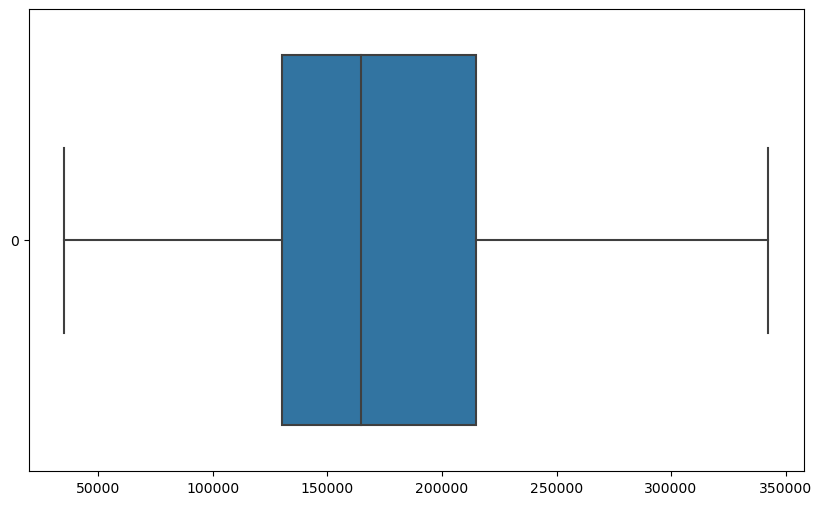

In [127]:
plt.rcParams['figure.figsize']=10,6
sns.boxplot(data['SalePrice'],orient='h')
plt.show()


<Axes: >

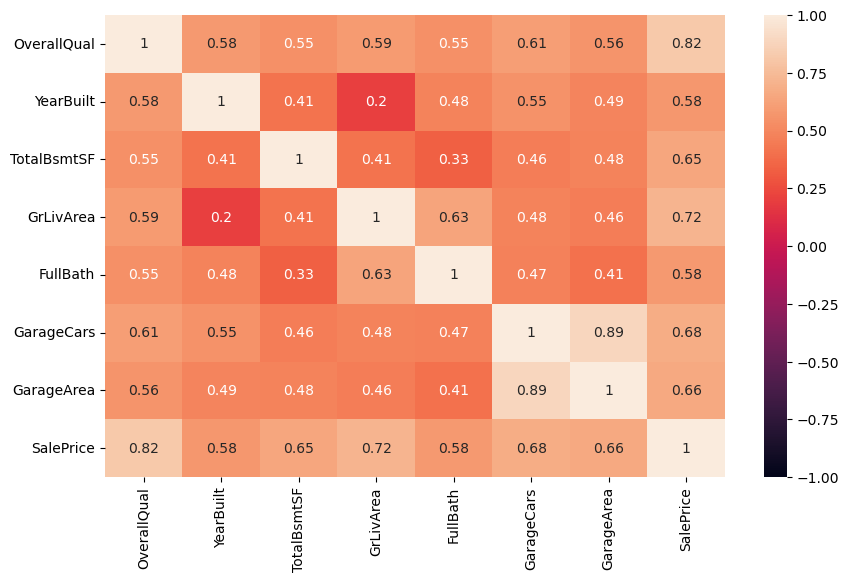

In [128]:
sns.heatmap(data.corr(),vmax=1,vmin=-1,annot=True)